<a href="https://colab.research.google.com/github/RUMONMD89/Data-Science-with-Python/blob/main/ADS8REV_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: xlabel='Alcohol_flag'>

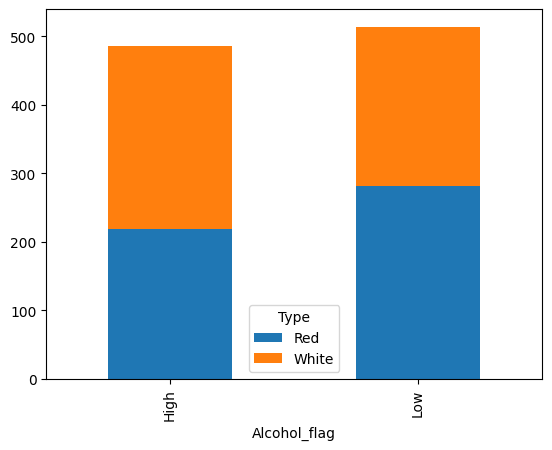

In [ ]:
# 8.単純ベイズ分類器
# 8･5･1 単純ベイズ（Python）
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools

wine_tr = pd.read_csv("wine_flag_training.csv")
wine_test = pd.read_csv("wine_flag_test.csv")

t1 = pd.crosstab(wine_tr['Type'], wine_tr['Alcohol_flag'])
t1['Total'] = t1.sum(axis=1)
t1.loc['Total'] = t1.sum()
t1
t1_plot = pd.crosstab(wine_tr['Alcohol_flag'], wine_tr['Type'])
t1_plot.plot(kind='bar', stacked=True)

<Axes: xlabel='Sugar_flag'>

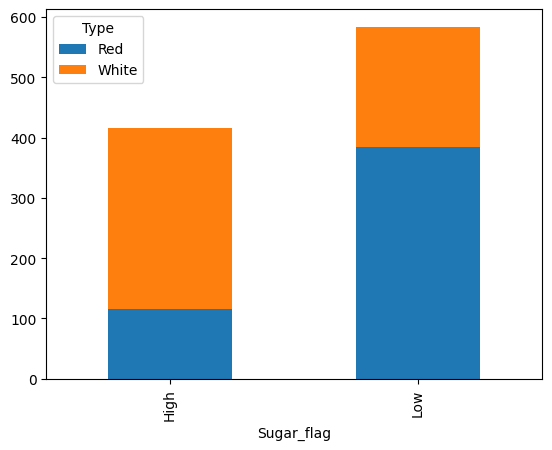

In [ ]:
t2 = pd.crosstab(wine_tr['Type'], wine_tr['Sugar_flag'])
t2['Total'] = t2.sum(axis=1)
t2.loc['Total'] = t2.sum()
t2
t2_plot = pd.crosstab(wine_tr['Sugar_flag'], wine_tr['Type'])
t2_plot.plot(kind='bar', stacked=True)

In [ ]:
X_Alcohol_ind = np.array(wine_tr['Alcohol_flag'])
#(X_Alcohol_ind, X_Alcohol_ind_dict) = stattools.categorical(X_Alcohol_ind, drop=True, dictnames=True)
X_Alcohol_ind = pd.get_dummies(X_Alcohol_ind)
X_Alcohol_ind = pd.DataFrame(X_Alcohol_ind)

X_Sugar_ind = np.array(wine_tr['Sugar_flag'])
#(X_Sugar_ind, X_Sugar_ind_dict) = stattools.categorical(X_Sugar_ind, drop=True, dictnames=True)
X_Sugar_ind = pd.get_dummies(X_Sugar_ind)
X_Sugar_ind = pd.DataFrame(X_Sugar_ind)
X = pd.concat((X_Alcohol_ind, X_Sugar_ind), axis=1)
Y = wine_tr['Type']
nb_01 = MultinomialNB().fit(X, Y)

X_Alcohol_ind_test = np.array(wine_test['Alcohol_flag'])
#(X_Alcohol_ind_test, X_Alcohol_ind_dict_test) = stattools.categorical(X_Alcohol_ind_test, drop=True, dictnames=True)
X_Alcohol_ind_test = pd.get_dummies(X_Alcohol_ind_test)
X_Alcohol_ind_test = pd.DataFrame(X_Alcohol_ind_test)

X_Sugar_ind_test = np.array(wine_test['Sugar_flag'])
#(X_Sugar_ind_test, X_Sugar_ind_dict_test) = stattools.categorical(X_Sugar_ind_test, drop=True, dictnames=True)
X_Sugar_ind_test = pd.get_dummies(X_Sugar_ind_test)
X_Sugar_ind_test = pd.DataFrame(X_Sugar_ind_test)
X_test = pd.concat((X_Alcohol_ind_test, X_Sugar_ind_test), axis=1)

Y_predicted = nb_01.predict(X_test)
ypred = pd.crosstab(wine_test['Type'], Y_predicted, rownames=['Actual'], colnames=['Predicted'])
ypred['Total'] = ypred.sum(axis=1)
ypred.loc['Total'] = ypred.sum()
ypred

Predicted,Red,White,Total
Actual,,,
Red,464,121,585
White,678,1082,1760
Total,1142,1203,2345
